In [1]:
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Ai/PAMAP_features.csv", index_col=0)
df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [3]:
df.columns

Index(['sub_id', 'activity_id', 'act_level', 'hr_mean', 'hr_mean_normal',
       'hr_std', 'hr_std_normal', 'hand_tmp_mean', 'hand_tmp_std',
       'hand_acc_x_mean', 'hand_acc_x_std', 'hand_acc_y_mean',
       'hand_acc_y_std', 'hand_acc_z_mean', 'hand_acc_z_std',
       'hand_gyr_x_mean', 'hand_gyr_x_std', 'hand_gyr_y_mean',
       'hand_gyr_y_std', 'hand_gyr_z_mean', 'hand_gyr_z_std', 'chest_tmp_mean',
       'chest_tmp_std', 'chest_acc_x_mean', 'chest_acc_x_std',
       'chest_acc_y_mean', 'chest_acc_y_std', 'chest_acc_z_mean',
       'chest_acc_z_std', 'chest_gyr_x_mean', 'chest_gyr_x_std',
       'chest_gyr_y_mean', 'chest_gyr_y_std', 'chest_gyr_z_mean',
       'chest_gyr_z_std', 'ankle_tmp_mean', 'ankle_tmp_std',
       'ankle_acc_x_mean', 'ankle_acc_x_std', 'ankle_acc_y_mean',
       'ankle_acc_y_std', 'ankle_acc_z_mean', 'ankle_acc_z_std',
       'ankle_gyr_x_mean', 'ankle_gyr_x_std', 'ankle_gyr_y_mean',
       'ankle_gyr_y_std', 'ankle_gyr_z_mean', 'ankle_gyr_z_std',
       '

In [4]:
df = df.dropna()
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [26]:

#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['sub_id'] = label.fit_transform(df['sub_id'])
df['activity_id'] = label.fit_transform(df['activity_id'])
df['act_level'] = label.fit_transform(df['act_level'])

df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,1,10,0,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,3,1,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,6,4,2,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,6,10,0,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,7,2,0,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,5,1,0,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,2,1,0,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,5,3,1,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,1,6,1,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [27]:
new_df=df[['activity_id', 'hr_mean', 'hr_mean_normal',
       'hr_std', 'hr_std_normal', 'hand_tmp_mean', 'hand_tmp_std',
       'hand_acc_x_mean', 'hand_acc_x_std', 'hand_acc_y_mean',
       'hand_acc_y_std', 'hand_acc_z_mean', 'hand_acc_z_std',
       'hand_gyr_x_mean', 'hand_gyr_x_std', 'hand_gyr_y_mean',
       'hand_gyr_y_std', 'hand_gyr_z_mean', 'hand_gyr_z_std', 'chest_tmp_mean',
       'chest_tmp_std', 'chest_acc_x_mean', 'chest_acc_x_std',
       'chest_acc_y_mean', 'chest_acc_y_std', 'chest_acc_z_mean',
       'chest_acc_z_std', 'chest_gyr_x_mean', 'chest_gyr_x_std',
       'chest_gyr_y_mean', 'chest_gyr_y_std', 'chest_gyr_z_mean',
       'chest_gyr_z_std', 'ankle_tmp_mean', 'ankle_tmp_std',
       'ankle_acc_x_mean', 'ankle_acc_x_std', 'ankle_acc_y_mean',
       'ankle_acc_y_std', 'ankle_acc_z_mean', 'ankle_acc_z_std',
       'ankle_gyr_x_mean', 'ankle_gyr_x_std', 'ankle_gyr_y_mean',
       'ankle_gyr_y_std', 'ankle_gyr_z_mean', 'ankle_gyr_z_std',
       'hand_acc_xy_cor', 'hand_acc_yz_cor', 'hand_acc_xz_cor',
       'chest_acc_xy_cor', 'chest_acc_yz_cor', 'chest_acc_xz_cor',
       'ankle_acc_xy_cor', 'ankle_acc_yz_cor', 'ankle_acc_xz_cor',
       'hand_gyr_xy_cor', 'hand_gyr_yz_cor', 'hand_gyr_xz_cor',
       'chest_gyr_xy_cor', 'chest_gyr_yz_cor', 'chest_gyr_xz_cor',
       'ankle_gyr_xy_cor', 'ankle_gyr_yz_cor', 'ankle_gyr_xz_cor']]

new_df

,activity_id,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,10,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,2.383779,3.381285,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,3,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,3.734766,3.069947,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,4,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,10.188184,11.705779,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,10,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,1.935690,0.542981,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,2,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,0.082824,1.006239,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,1,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,0.087374,1.634235,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,1,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,0.086820,3.379703,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,3,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,1.780491,3.100475,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,6,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,3.245008,6.196727,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [28]:
df['activity_id'].value_counts()

activity_id
10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: count, dtype: int64

In [29]:
X=new_df.drop('activity_id',axis=1)
X.head()

,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,87.000000,1.175676,0.000000,7.105427e-15,34.3750,0.0,-1.165524,2.383779,3.381285,2.582771,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,124.605469,1.683858,0.927920,1.253946e-02,31.8750,0.0,-12.040995,3.734766,3.069947,2.591651,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,113.493430,1.891557,2.315888,3.859813e-02,32.5000,0.0,-3.723040,10.188184,11.705779,17.220389,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,82.513672,1.375228,0.492657,8.210948e-03,33.8125,0.0,-3.618932,1.935690,0.542981,2.907890,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,73.000000,1.106061,0.000000,7.327472e-15,34.4375,0.0,-9.275877,0.082824,1.006239,0.153816,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685


In [30]:
y=new_df['activity_id']
y.head()

3006     10
3497      3
14495     4
13278    10
14969     2
Name: activity_id, dtype: int64

In [31]:
import pandas as pd

Y=pd.get_dummies(encoded_labels).values
X=X.values

In [32]:
X

array([[ 8.70000000e+01,  1.17567568e+00,  0.00000000e+00, ...,
        -3.05958745e-01, -3.00077749e-03, -6.38866238e-01],
       [ 1.24605469e+02,  1.68385769e+00,  9.27919950e-01, ...,
        -6.53133351e-01, -6.54575222e-01,  3.91363415e-01],
       [ 1.13493430e+02,  1.89155717e+00,  2.31588751e+00, ...,
        -6.60278246e-01, -5.28137910e-01,  4.02146741e-01],
       ...,
       [ 9.34453125e+01,  1.55742187e+00,  4.93414776e-01, ...,
        -5.55865799e-01, -4.42848703e-01,  6.32073012e-02],
       [ 1.29160156e+02,  1.74540752e+00,  3.61877174e-01, ...,
        -7.52563011e-01, -6.27184592e-01,  4.36639097e-01],
       [ 1.42234375e+02,  1.92208615e+00,  1.71446392e+00, ...,
        -1.64102644e-02, -6.62742491e-01, -8.59535039e-02]])

In [33]:
Y

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((9418, 64), (2355, 64), (9418, 12), (2355, 12))

In [43]:
#모델 생성

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(64,input_shape=(X_train.shape[1],),activation='relu')) #imput_shape->입력층, )
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
#model.add(Dense(18,activation='relu'))
#model.add(Dense(15,activation='relu'))
#model.add(Dense(15,activation='relu'))
model.add(Dense(12,activation='softmax')) #다층 퍼셉트론 -> softmax / 퍼셉트론 -> sigmoid, 출력층은 class갯수가 되도록

model.compile(Adam(learning_rate=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,972 (27.23 KB)

 Trainable params: 6,972 (27.23 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
import numpy as np
#x는 학습 데이터, y는 학습데이터 출력(타겟), epochs는 전체 학습데이터를 몇번할지, batch_size는 한번에 학습시킬 개수,validation_data는 검증시킬 데이터(모델 성능 평가)
model_history=model.fit(x=X_train, y=y_train, epochs=0, batch_size=30,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5392 - loss: 1.8988 - val_accuracy: 0.8323 - val_loss: 0.5003
Epoch 2/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.8496 - loss: 0.4285 - val_accuracy: 0.8365 - val_loss: 0.5576
Epoch 3/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.9206 - loss: 0.2486 - val_accuracy: 0.8832 - val_loss: 0.4072
Epoch 4/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.9263 - loss: 0.2358 - val_accuracy: 0.9563 - val_loss: 0.1631
Epoch 5/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9505 - loss: 0.1650 - val_accuracy: 0.9435 - val_loss: 0.2197
Epoch 6/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9496 - loss: 0.1740 - val_accuracy: 0.9473 - val_loss: 0.1983
Epoch 7/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.9506 - loss: 0.1654 - val_accuracy: 0.9512 - val_loss: 0.2080
Epoch 8/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9308 - loss: 0.2490 - val_ac

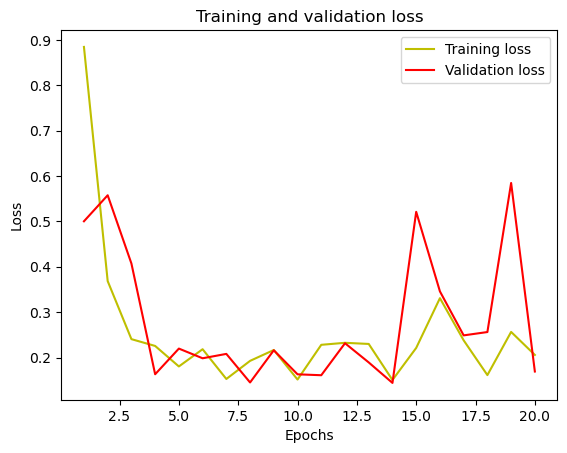

In [45]:

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

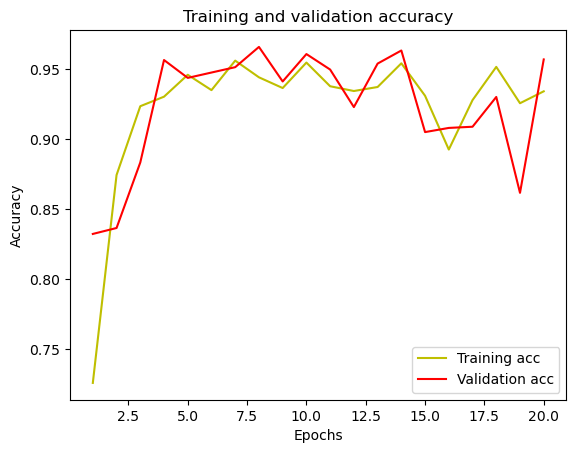

In [46]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       0.95      0.84      0.89       236
           2       0.87      0.93      0.90       236
           3       0.99      0.99      0.99       282
           4       0.96      0.99      0.98       122
           5       1.00      0.96      0.98       222
           6       0.99      1.00      0.99       242
           7       0.93      0.98      0.95       115
           8       1.00      0.98      0.99        86
           9       0.93      0.95      0.94       234
          10       0.93      0.95      0.94       284
          11       0.96      0.90      0.93        49

    accuracy                           0.96      2355
   macro avg       0.96      0.96      0.96      2355
weighted avg       0.96      0.96      0.96      2355

[[247   0   0   0   0   0   0   0   0   0   0   0]
 [  0 198  29   0   0   0   0   0   0   0   9   0]
 [  0   9 219   0   0   0   0  